# Lectura de archivos

In [1]:
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
id = '1br3fMwXX_J0XmiXvOm_wfKWvHSj45T3y'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train_values.csv')

train_values = pd.read_csv('train_values.csv', encoding='latin-1', dtype = {'building_id': 'int64', 'geo_level_2_id': 'int64', 'geo_level_3_id': 'int64',\
                                                                           'count_floors_pre_eq': 'int64', 'age': 'int64', 'area_percentage': 'int64', \
                                                                           'height_percentage': 'int64', 'land_surface_condition': 'category',\
                                                                           'foundation_type': 'category', 'roof_type': 'category', 'ground_floor_type': 'category',\
                                                                           'other_floor_type': 'category', 'position': 'category', 'plan_configuration': 'category',\
                                                                           'has_superstructure_adobe_mud': 'boolean', 'has_superstructure_mud_mortar_stone': 'boolean', \
                                                                           'has_superstructure_stone_flag': 'boolean', 'has_superstructure_cement_mortar_stone': 'boolean',\
                                                                           'has_superstructure_mud_mortar_brick': 'boolean', 'has_superstructure_cement_mortar_brick': 'boolean',\
                                                                           'has_superstructure_timber': 'boolean', 'has_superstructure_bamboo': 'boolean',\
                                                                           'has_superstructure_rc_non_engineered': 'boolean', 'has_superstructure_rc_engineered': 'boolean',\
                                                                           'has_superstructure_other': 'boolean', 'legal_ownership_status': 'category', 'count_families': 'int64', \
                                                                           'has_secondary_use': 'boolean', 'has_secondary_use_agriculture': 'boolean', 'has_secondary_use_hotel': 'boolean', \
                                                                           'has_secondary_use_rental': 'boolean', 'has_secondary_use_institution': 'boolean', 'has_secondary_use_school': 'boolean',\
                                                                           'has_secondary_use_industry': 'boolean', 'has_secondary_use_health_post': 'boolean', \
                                                                           'has_secondary_use_gov_office': 'boolean', 'has_secondary_use_use_police': 'boolean', 'has_secondary_use_other': 'boolean'}, index_col='building_id')

In [4]:
id = '1RUtolRcQlR3RGULttM4ZoQaK_Ouow4gc'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train_labels.csv')
train_labels = pd.read_csv('train_labels.csv', encoding='latin-1', dtype={'building_id': 'int64', 'damage_grade': 'int64'}, index_col='building_id')

In [5]:
print(train_labels.shape)
print(train_values.shape)

(260601, 1)
(260601, 38)


In [6]:
id = '1kt2VFhgpfRS72wtBOBy1KDat9LanfMZU'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('test_values.csv')

test_values = pd.read_csv('test_values.csv', encoding='latin-1', dtype = {'building_id': 'int64', 'geo_level_2_id': 'int64', 'geo_level_3_id': 'int64',\
                                                                           'count_floors_pre_eq': 'int64', 'age': 'int64', 'area_percentage': 'int64', \
                                                                           'height_percentage': 'int64', 'land_surface_condition': 'category',\
                                                                           'foundation_type': 'category', 'roof_type': 'category', 'ground_floor_type': 'category',\
                                                                           'other_floor_type': 'category', 'position': 'category', 'plan_configuration': 'category',\
                                                                           'has_superstructure_adobe_mud': 'boolean', 'has_superstructure_mud_mortar_stone': 'boolean', \
                                                                           'has_superstructure_stone_flag': 'boolean', 'has_superstructure_cement_mortar_stone': 'boolean',\
                                                                           'has_superstructure_mud_mortar_brick': 'boolean', 'has_superstructure_cement_mortar_brick': 'boolean',\
                                                                           'has_superstructure_timber': 'boolean', 'has_superstructure_bamboo': 'boolean',\
                                                                           'has_superstructure_rc_non_engineered': 'boolean', 'has_superstructure_rc_engineered': 'boolean',\
                                                                           'has_superstructure_other': 'boolean', 'legal_ownership_status': 'category', 'count_families': 'int64', \
                                                                           'has_secondary_use': 'boolean', 'has_secondary_use_agriculture': 'boolean', 'has_secondary_use_hotel': 'boolean', \
                                                                           'has_secondary_use_rental': 'boolean', 'has_secondary_use_institution': 'boolean', 'has_secondary_use_school': 'boolean',\
                                                                           'has_secondary_use_industry': 'boolean', 'has_secondary_use_health_post': 'boolean', \
                                                                           'has_secondary_use_gov_office': 'boolean', 'has_secondary_use_use_police': 'boolean', 'has_secondary_use_other': 'boolean'})

In [7]:
#train_values.set_index('building_id', inplace=True)
test_values.set_index('building_id', inplace=True)

# Feature Engineering

## Reemplazo Age con un modelo de regresion. Tratamiento de outliers



In [8]:
!pip install catboost

     |████████████████████████████████| 69.2 MB 6.0 kB/s 


In [9]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Creamos modelo de regresion con CatBoostRegressor porque trabaja con variables categoricas. 

Al final esta el modelo para hacer un load. Dejo comentado el fit por el tiempo de entrenamiento. 

In [10]:
reg = CatBoostRegressor()

In [11]:
X_reg_model = train_values[train_values['age'] != 995]
y_reg_model = X_reg_model[['age']]
X_reg_model = X_reg_model.drop(columns = 'age')

In [12]:
y_reg_model = y_reg_model['age'].values

In [13]:
X_reg_model_train, X_reg_model_valid, y_reg_model_train, y_reg_model_valid = train_test_split(X_reg_model, y_reg_model, test_size=0.2, random_state=42)

In [14]:
cat_features = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'land_surface_condition', 'foundation_type', 'roof_type', 
                    'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']

In [15]:
X_reg_model_train = X_reg_model_train.astype(dtype = {'geo_level_2_id': 'category', 'geo_level_3_id': 'category',\
                                                                           'count_floors_pre_eq': 'int64', 'area_percentage': 'int64', \
                                                                           'height_percentage': 'int64', 'land_surface_condition': 'category',\
                                                                           'foundation_type': 'category', 'roof_type': 'category', 'ground_floor_type': 'category',\
                                                                           'other_floor_type': 'category', 'position': 'category', 'plan_configuration': 'category',\
                                                                           'has_superstructure_adobe_mud': 'int64', 'has_superstructure_mud_mortar_stone': 'int64', \
                                                                           'has_superstructure_stone_flag': 'int64', 'has_superstructure_cement_mortar_stone': 'int64',\
                                                                           'has_superstructure_mud_mortar_brick': 'int64', 'has_superstructure_cement_mortar_brick': 'int64',\
                                                                           'has_superstructure_timber': 'int64', 'has_superstructure_bamboo': 'int64',\
                                                                           'has_superstructure_rc_non_engineered': 'int64', 'has_superstructure_rc_engineered': 'int64',\
                                                                           'has_superstructure_other': 'int64', 'legal_ownership_status': 'category', 'count_families': 'int64', \
                                                                           'has_secondary_use': 'int64', 'has_secondary_use_agriculture': 'int64', 'has_secondary_use_hotel': 'int64', \
                                                                           'has_secondary_use_rental': 'int64', 'has_secondary_use_institution': 'int64', 'has_secondary_use_school': 'int64',\
                                                                           'has_secondary_use_industry': 'int64', 'has_secondary_use_health_post': 'int64', \
                                                                           'has_secondary_use_gov_office': 'int64', 'has_secondary_use_use_police': 'int64', 'has_secondary_use_other': 'int64'})

X_reg_model_valid = X_reg_model_valid.astype(dtype = {'geo_level_2_id': 'category', 'geo_level_3_id': 'category',\
                                                                           'count_floors_pre_eq': 'int64', 'area_percentage': 'int64', \
                                                                           'height_percentage': 'int64', 'land_surface_condition': 'category',\
                                                                           'foundation_type': 'category', 'roof_type': 'category', 'ground_floor_type': 'category',\
                                                                           'other_floor_type': 'category', 'position': 'category', 'plan_configuration': 'category',\
                                                                           'has_superstructure_adobe_mud': 'int64', 'has_superstructure_mud_mortar_stone': 'int64', \
                                                                           'has_superstructure_stone_flag': 'int64', 'has_superstructure_cement_mortar_stone': 'int64',\
                                                                           'has_superstructure_mud_mortar_brick': 'int64', 'has_superstructure_cement_mortar_brick': 'int64',\
                                                                           'has_superstructure_timber': 'int64', 'has_superstructure_bamboo': 'int64',\
                                                                           'has_superstructure_rc_non_engineered': 'int64', 'has_superstructure_rc_engineered': 'int64',\
                                                                           'has_superstructure_other': 'int64', 'legal_ownership_status': 'category', 'count_families': 'int64', \
                                                                           'has_secondary_use': 'int64', 'has_secondary_use_agriculture': 'int64', 'has_secondary_use_hotel': 'int64', \
                                                                           'has_secondary_use_rental': 'int64', 'has_secondary_use_institution': 'int64', 'has_secondary_use_school': 'int64',\
                                                                           'has_secondary_use_industry': 'int64', 'has_secondary_use_health_post': 'int64', \
                                                                           'has_secondary_use_gov_office': 'int64', 'has_secondary_use_use_police': 'int64', 'has_secondary_use_other': 'int64'})


In [16]:
pool_reg_model_train = Pool(X_reg_model_train, y_reg_model_train, cat_features = cat_features)
pool_reg_model_test = Pool(X_reg_model_valid, y_reg_model_valid, cat_features = cat_features)

In [17]:
#reg.fit(pool_reg_model_train, verbose=5)

In [18]:
#reg.save_model('age_predictions.bin')

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
reg.load_model('age_predictions.bin')

CatBoostError: ignored

In [ ]:
y_pred = reg.predict(pool_reg_model_test) 

In [ ]:
r2_score(y_reg_model_valid, y_pred)

No es bueno el score, pero no necesitamos algo excelente. 

### Predecimos age 

Agregamos columna indicando si fue modificado el valor de age o no.



In [ ]:
train_values['age_predicted'] = train_values['age'] == 995
test_values['age_predicted'] = test_values['age'] == 995

In [ ]:
X_test = train_values[train_values['age'] == 995]
X_test = X_test.drop(columns = 'age')

In [ ]:
X_test = X_test.astype(dtype = {'geo_level_2_id': 'category', 'geo_level_3_id': 'category',\
                                'count_floors_pre_eq': 'int64', 'area_percentage': 'int64', \
                                'height_percentage': 'int64', 'land_surface_condition': 'category',\
                                'foundation_type': 'category', 'roof_type': 'category', 'ground_floor_type': 'category',\
                                'other_floor_type': 'category', 'position': 'category', 'plan_configuration': 'category',\
                                'has_superstructure_adobe_mud': 'int64', 'has_superstructure_mud_mortar_stone': 'int64', \
                                'has_superstructure_stone_flag': 'int64', 'has_superstructure_cement_mortar_stone': 'int64',\
                                'has_superstructure_mud_mortar_brick': 'int64', 'has_superstructure_cement_mortar_brick': 'int64',\
                                'has_superstructure_timber': 'int64', 'has_superstructure_bamboo': 'int64',\
                                'has_superstructure_rc_non_engineered': 'int64', 'has_superstructure_rc_engineered': 'int64',\
                                'has_superstructure_other': 'int64', 'legal_ownership_status': 'category', 'count_families': 'int64', \
                                'has_secondary_use': 'int64', 'has_secondary_use_agriculture': 'int64', 'has_secondary_use_hotel': 'int64', \
                                'has_secondary_use_rental': 'int64', 'has_secondary_use_institution': 'int64', 'has_secondary_use_school': 'int64',\
                                'has_secondary_use_industry': 'int64', 'has_secondary_use_health_post': 'int64', \
                                'has_secondary_use_gov_office': 'int64', 'has_secondary_use_use_police': 'int64', 'has_secondary_use_other': 'int64'})

In [ ]:
new_age = reg.predict(X_test)

In [ ]:
new_age

In [ ]:
X_test['age'] = new_age

In [ ]:
X_test = X_test.astype(dtype = {'geo_level_2_id': 'int64', 'geo_level_3_id': 'int64',\
                                'count_floors_pre_eq': 'int64', 'age': 'int64', 'area_percentage': 'int64', \
                                'height_percentage': 'int64', 'land_surface_condition': 'category',\
                                'foundation_type': 'category', 'roof_type': 'category', 'ground_floor_type': 'category',\
                                'other_floor_type': 'category', 'position': 'category', 'plan_configuration': 'category',\
                                'has_superstructure_adobe_mud': 'boolean', 'has_superstructure_mud_mortar_stone': 'boolean', \
                                'has_superstructure_stone_flag': 'boolean', 'has_superstructure_cement_mortar_stone': 'boolean',\
                                'has_superstructure_mud_mortar_brick': 'boolean', 'has_superstructure_cement_mortar_brick': 'boolean',\
                                'has_superstructure_timber': 'boolean', 'has_superstructure_bamboo': 'boolean',\
                                'has_superstructure_rc_non_engineered': 'boolean', 'has_superstructure_rc_engineered': 'boolean',\
                                'has_superstructure_other': 'boolean', 'legal_ownership_status': 'category', 'count_families': 'int64', \
                                'has_secondary_use': 'boolean', 'has_secondary_use_agriculture': 'boolean', 'has_secondary_use_hotel': 'boolean', \
                                'has_secondary_use_rental': 'boolean', 'has_secondary_use_institution': 'boolean', 'has_secondary_use_school': 'boolean',\
                                'has_secondary_use_industry': 'boolean', 'has_secondary_use_health_post': 'boolean', \
                                'has_secondary_use_gov_office': 'boolean', 'has_secondary_use_use_police': 'boolean', 'has_secondary_use_other': 'boolean'})

In [ ]:
X_reg_model = train_values[train_values['age'] != 995]
train_values = X_reg_model.append(X_test)

En TestValues tambien hay mucho edificios con age 995. Los modificamos con el modelo. 

In [ ]:
(test_values[test_values['age'] > 900]).shape

In [ ]:
X_test_test = test_values[test_values['age'] == 995]
X_test_test = X_test_test.drop(columns = 'age')

In [ ]:
X_test_test = X_test_test.astype(dtype = {'geo_level_2_id': 'category', 'geo_level_3_id': 'category',\
                                          'count_floors_pre_eq': 'int64', 'area_percentage': 'int64', \
                                          'height_percentage': 'int64', 'land_surface_condition': 'category',\
                                          'foundation_type': 'category', 'roof_type': 'category', 'ground_floor_type': 'category',\
                                          'other_floor_type': 'category', 'position': 'category', 'plan_configuration': 'category',\
                                          'has_superstructure_adobe_mud': 'int64', 'has_superstructure_mud_mortar_stone': 'int64', \
                                          'has_superstructure_stone_flag': 'int64', 'has_superstructure_cement_mortar_stone': 'int64',\
                                          'has_superstructure_mud_mortar_brick': 'int64', 'has_superstructure_cement_mortar_brick': 'int64',\
                                          'has_superstructure_timber': 'int64', 'has_superstructure_bamboo': 'int64',\
                                          'has_superstructure_rc_non_engineered': 'int64', 'has_superstructure_rc_engineered': 'int64',\
                                          'has_superstructure_other': 'int64', 'legal_ownership_status': 'category', 'count_families': 'int64', \
                                          'has_secondary_use': 'int64', 'has_secondary_use_agriculture': 'int64', 'has_secondary_use_hotel': 'int64', \
                                          'has_secondary_use_rental': 'int64', 'has_secondary_use_institution': 'int64', 'has_secondary_use_school': 'int64',\
                                          'has_secondary_use_industry': 'int64', 'has_secondary_use_health_post': 'int64', \
                                          'has_secondary_use_gov_office': 'int64', 'has_secondary_use_use_police': 'int64', 'has_secondary_use_other': 'int64'})

In [ ]:
new_age_tests = reg.predict(X_test_test)

In [ ]:
X_test_test['age'] = new_age_tests

In [ ]:
X_test_test = X_test_test.astype(dtype = {'geo_level_2_id': 'int64', 'geo_level_3_id': 'int64',\
                                                                           'count_floors_pre_eq': 'int64', 'age': 'int64', 'area_percentage': 'int64', \
                                                                           'height_percentage': 'int64', 'land_surface_condition': 'category',\
                                                                           'foundation_type': 'category', 'roof_type': 'category', 'ground_floor_type': 'category',\
                                                                           'other_floor_type': 'category', 'position': 'category', 'plan_configuration': 'category',\
                                                                           'has_superstructure_adobe_mud': 'boolean', 'has_superstructure_mud_mortar_stone': 'boolean', \
                                                                           'has_superstructure_stone_flag': 'boolean', 'has_superstructure_cement_mortar_stone': 'boolean',\
                                                                           'has_superstructure_mud_mortar_brick': 'boolean', 'has_superstructure_cement_mortar_brick': 'boolean',\
                                                                           'has_superstructure_timber': 'boolean', 'has_superstructure_bamboo': 'boolean',\
                                                                           'has_superstructure_rc_non_engineered': 'boolean', 'has_superstructure_rc_engineered': 'boolean',\
                                                                           'has_superstructure_other': 'boolean', 'legal_ownership_status': 'category', 'count_families': 'int64', \
                                                                           'has_secondary_use': 'boolean', 'has_secondary_use_agriculture': 'boolean', 'has_secondary_use_hotel': 'boolean', \
                                                                           'has_secondary_use_rental': 'boolean', 'has_secondary_use_institution': 'boolean', 'has_secondary_use_school': 'boolean',\
                                                                           'has_secondary_use_industry': 'boolean', 'has_secondary_use_health_post': 'boolean', \
                                                                           'has_secondary_use_gov_office': 'boolean', 'has_secondary_use_use_police': 'boolean', 'has_secondary_use_other': 'boolean'})

In [ ]:
X_test_true = test_values[test_values['age'] != 995]
test_values = X_test_true.append(X_test_test)

##Promedio de edad según la zona geográfica:

In [ ]:
geo_levels = train_values[['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'age']]
geo_levels.reset_index(inplace=True)

age_avg_1 = geo_levels.groupby('geo_level_1_id')['age'].mean()
age_avg_2 = geo_levels.groupby('geo_level_2_id')['age'].mean()
age_avg_3 = geo_levels.groupby('geo_level_3_id')['age'].mean()

age_avg_1.rename('age_avg_geo_level_1_id', inplace=True)
age_avg_2.rename('age_avg_geo_level_2_id', inplace=True)
age_avg_3.rename('age_avg_geo_level_3_id', inplace=True)

geo_levels = geo_levels\
      .merge(age_avg_1, on='geo_level_1_id')\
      .merge(age_avg_2, on='geo_level_2_id')\
      .merge(age_avg_3, on='geo_level_3_id')

In [ ]:
test_values.shape

In [ ]:
test_values = test_values.merge(pd.DataFrame(age_avg_1), left_on = 'geo_level_1_id', right_index= True)\
           .merge(pd.DataFrame(age_avg_2), left_on = 'geo_level_2_id', right_index= True, how= 'left')\
           .merge(pd.DataFrame(age_avg_3), left_on = 'geo_level_3_id', right_index= True, how= 'left')

In [ ]:
geo_levels.set_index('building_id', inplace=True)
new_features = ['building_id', 'age_avg_geo_level_1_id', 'age_avg_geo_level_2_id', 'age_avg_geo_level_3_id']
geo_levels.reset_index(inplace=True)
train_values.reset_index(inplace=True)
train_values = train_values.merge(geo_levels[new_features]).set_index('building_id')

In [ ]:
test_values.isnull().sum()

Se observa que hay 5 geo_level_id_2 nuevos en el set de testing. Remplazamos el valor con el promedio sobre el superior. Es decir, para el avg de la localizacion en 2 y en 3, los remplazaremos con el promedio en 1 y en 2 respectivamente. Cuando no se pueda con el superior, lo hacemos con el superior a este. 

In [ ]:
test_values.loc[test_values['age_avg_geo_level_2_id'].isnull(),'age_avg_geo_level_2_id'] = test_values['age_avg_geo_level_1_id']
test_values.loc[test_values['age_avg_geo_level_3_id'].isnull(),'age_avg_geo_level_3_id'] = test_values['age_avg_geo_level_2_id']
test_values.isnull().sum().sum()

## Combinacion categoricas importantes con zonas geograficas

In [ ]:
to_merge = train_values.copy()
to_merge['count_f_type_r_geo_1'] = train_values['foundation_type'] == 'r'
to_merge = to_merge.groupby('geo_level_1_id').sum()['count_f_type_r_geo_1'].to_frame()
train_values = train_values.reset_index().merge(to_merge, on = 'geo_level_1_id')
test_values = test_values.reset_index().merge(to_merge, on = 'geo_level_1_id')

In [ ]:
train_values = train_values.set_index('building_id')

In [ ]:
test_values = test_values.set_index('building_id')

In [ ]:
to_merge = train_values.copy()
to_merge['count_roof_type_n_geo_1'] = train_values['roof_type'] == 'n'
to_merge = to_merge.groupby('geo_level_1_id').sum()['count_roof_type_n_geo_1'].to_frame()
train_values = train_values.reset_index().merge(to_merge, on = 'geo_level_1_id')
test_values = test_values.reset_index().merge(to_merge, on = 'geo_level_1_id')

In [ ]:
train_values = train_values.set_index('building_id')

In [ ]:
test_values = test_values.set_index('building_id')

## Promedio de Cantidad de familias en las zonas geográficas

In [ ]:
count_families = train_values[['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_families']]
count_families.reset_index(inplace=True)

families_1 = count_families.groupby('geo_level_1_id')['count_families'].mean()
families_2 = count_families.groupby('geo_level_2_id')['count_families'].mean()
families_3 = count_families.groupby('geo_level_3_id')['count_families'].mean()

families_1.rename('mean_families_geo_level_1_id', inplace=True)
families_2.rename('mean_families_geo_level_2_id', inplace=True)
families_3.rename('mean_families_geo_level_3_id', inplace=True)

count_families = count_families\
      .merge(families_1, on='geo_level_1_id')\
      .merge(families_2, on='geo_level_2_id')\
      .merge(families_3, on='geo_level_3_id')

In [ ]:
test_values = test_values.merge(pd.DataFrame(families_1), left_on = 'geo_level_1_id', right_index= True)\
           .merge(pd.DataFrame(families_2), left_on = 'geo_level_2_id', right_index= True, how= 'left')\
           .merge(pd.DataFrame(families_3), left_on = 'geo_level_3_id', right_index= True, how= 'left')

In [ ]:
count_families.set_index('building_id', inplace=True)
new_features = ['building_id', 'mean_families_geo_level_1_id', 'mean_families_geo_level_2_id', 'mean_families_geo_level_3_id']
count_families.reset_index(inplace=True)
train_values.reset_index(inplace=True)
train_values = train_values.merge(count_families[new_features]).set_index('building_id')

In [ ]:
test_values.loc[test_values['mean_families_geo_level_2_id'].isnull(),'mean_families_geo_level_2_id'] = test_values['mean_families_geo_level_1_id']
test_values.loc[test_values['mean_families_geo_level_3_id'].isnull(),'mean_families_geo_level_3_id'] = test_values['mean_families_geo_level_2_id']
test_values.isnull().sum().sum()

## Intervalos de confianza (solo para geo level id 1)

Para la cantidad de familias

In [ ]:
import numpy as np
import scipy.stats as st

In [ ]:
count_families = train_values[['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_families']]
count_families.reset_index(inplace=True)

counts = count_families.groupby('geo_level_1_id')['count_families'].count()
means = count_families.groupby('geo_level_1_id')['count_families'].mean()
stds = count_families.groupby('geo_level_1_id')['count_families'].std()

In [ ]:
test_values['min_mean_families_id_1'] = 0.0
train_values['min_mean_families_id_1'] = 0.0

test_values['max_mean_families_id_1'] = 0.0
train_values['max_mean_families_id_1'] = 0.0

In [ ]:
for count, mean, std, i in zip(counts, means, stds, range(31)):
  interval = st.t.interval(alpha=0.95, df=count-1, loc=mean, scale=std) 
  min = interval[0]
  max = interval[1]
  test_values.loc[test_values['geo_level_1_id'] == i,'min_mean_families_id_1'] = min
  test_values.loc[test_values['geo_level_1_id'] == i,'max_mean_families_id_1'] = max
  train_values.loc[train_values['geo_level_1_id'] == i,'min_mean_families_id_1'] = min
  train_values.loc[train_values['geo_level_1_id'] == i,'max_mean_families_id_1'] = max

Para Edad

In [ ]:
age = train_values[['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'age']]
age.reset_index(inplace=True)

counts = age.groupby('geo_level_1_id')['age'].count()
means = age.groupby('geo_level_1_id')['age'].mean()
stds = age.groupby('geo_level_1_id')['age'].std()

In [ ]:
test_values['min_mean_age_id_1'] = 0.0
train_values['min_mean_age_id_1'] = 0.0

test_values['max_mean_age_id_1'] = 0.0
train_values['max_mean_age_id_1'] = 0.0

In [ ]:
for count, mean, std, i in zip(counts, means, stds, range(31)):
  interval = st.t.interval(alpha=0.95, df=count-1, loc=mean, scale=std) 
  min = interval[0]
  max = interval[1]
  test_values.loc[test_values['geo_level_1_id'] == i,'min_mean_age_id_1'] = min
  test_values.loc[test_values['geo_level_1_id'] == i,'max_mean_age_id_1'] = max
  train_values.loc[train_values['geo_level_1_id'] == i,'min_mean_age_id_1'] = min
  train_values.loc[train_values['geo_level_1_id'] == i,'max_mean_age_id_1'] = max

Para Height

In [ ]:
height_percentage = train_values[['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'height_percentage']]
height_percentage.reset_index(inplace=True)

counts = height_percentage.groupby('geo_level_1_id')['height_percentage'].count()
means = height_percentage.groupby('geo_level_1_id')['height_percentage'].mean()
stds = height_percentage.groupby('geo_level_1_id')['height_percentage'].std()

In [ ]:
test_values['min_mean_height_percentage_id_1'] = 0.0
train_values['min_mean_height_percentage_id_1'] = 0.0

test_values['max_mean_height_percentage_id_1'] = 0.0
train_values['max_mean_height_percentage_id_1'] = 0.0

In [ ]:
for count, mean, std, i in zip(counts, means, stds, range(31)):
  interval = st.t.interval(alpha=0.95, df=count-1, loc=mean, scale=std) 
  min = interval[0]
  max = interval[1]
  test_values.loc[test_values['geo_level_1_id'] == i,'min_mean_height_percentage_id_1'] = min
  test_values.loc[test_values['geo_level_1_id'] == i,'max_mean_height_percentage_id_1'] = max
  train_values.loc[train_values['geo_level_1_id'] == i,'min_mean_height_percentage_id_1'] = min
  train_values.loc[train_values['geo_level_1_id'] == i,'max_mean_height_percentage_id_1'] = max

Para Area

In [ ]:
area_percentage = train_values[['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'area_percentage']]
area_percentage.reset_index(inplace=True)

counts = area_percentage.groupby('geo_level_1_id')['area_percentage'].count()
means = area_percentage.groupby('geo_level_1_id')['area_percentage'].mean()
stds = area_percentage.groupby('geo_level_1_id')['area_percentage'].std()

In [ ]:
test_values['min_mean_area_percentage_id_1'] = 0.0
train_values['min_mean_area_percentage_id_1'] = 0.0

test_values['max_mean_area_percentage_id_1'] = 0.0
train_values['max_mean_area_percentage_id_1'] = 0.0

In [ ]:
for count, mean, std, i in zip(counts, means, stds, range(31)):
  interval = st.t.interval(alpha=0.95, df=count-1, loc=mean, scale=std) 
  min = interval[0]
  max = interval[1]
  test_values.loc[test_values['geo_level_1_id'] == i,'min_mean_area_percentage_id_1'] = min
  test_values.loc[test_values['geo_level_1_id'] == i,'max_mean_area_percentage_id_1'] = max
  train_values.loc[train_values['geo_level_1_id'] == i,'min_mean_area_percentage_id_1'] = min
  train_values.loc[train_values['geo_level_1_id'] == i,'max_mean_area_percentage_id_1'] = max

## Ocupa más área, altura y cantidad de pisos que la media?

In [ ]:
count_floors_pre_eq = train_values[['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq']]
count_floors_pre_eq.reset_index(inplace=True)

families_1 = count_floors_pre_eq.groupby('geo_level_1_id')['count_floors_pre_eq'].mean()
families_2 = count_floors_pre_eq.groupby('geo_level_2_id')['count_floors_pre_eq'].mean()
families_3 = count_floors_pre_eq.groupby('geo_level_3_id')['count_floors_pre_eq'].mean()

families_1.rename('mean_floors_geo_level_1_id', inplace=True)
families_2.rename('mean_floors_geo_level_2_id', inplace=True)
families_3.rename('mean_floors_geo_level_3_id', inplace=True)

count_floors_pre_eq = count_floors_pre_eq\
      .merge(families_1, on='geo_level_1_id')\
      .merge(families_2, on='geo_level_2_id')\
      .merge(families_3, on='geo_level_3_id')


test_values = test_values.merge(pd.DataFrame(families_1), left_on = 'geo_level_1_id', right_index= True)\
           .merge(pd.DataFrame(families_2), left_on = 'geo_level_2_id', right_index= True, how= 'left')\
           .merge(pd.DataFrame(families_3), left_on = 'geo_level_3_id', right_index= True, how= 'left')

#-----------------------------------------------------------------------------------------------------

height_percentage = train_values[['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'height_percentage']]
height_percentage.reset_index(inplace=True)

families_1 = height_percentage.groupby('geo_level_1_id')['height_percentage'].mean()
families_2 = height_percentage.groupby('geo_level_2_id')['height_percentage'].mean()
families_3 = height_percentage.groupby('geo_level_3_id')['height_percentage'].mean()

families_1.rename('mean_height_geo_level_1_id', inplace=True)
families_2.rename('mean_height_geo_level_2_id', inplace=True)
families_3.rename('mean_height_geo_level_3_id', inplace=True)

height_percentage = height_percentage\
      .merge(families_1, on='geo_level_1_id')\
      .merge(families_2, on='geo_level_2_id')\
      .merge(families_3, on='geo_level_3_id')  


test_values = test_values.merge(pd.DataFrame(families_1), left_on = 'geo_level_1_id', right_index= True)\
           .merge(pd.DataFrame(families_2), left_on = 'geo_level_2_id', right_index= True, how= 'left')\
           .merge(pd.DataFrame(families_3), left_on = 'geo_level_3_id', right_index= True, how= 'left')


#-----------------------------------------------------------------------------------------------------


area_percentage = train_values[['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'area_percentage']]
area_percentage.reset_index(inplace=True)

families_1 = area_percentage.groupby('geo_level_1_id')['area_percentage'].mean()
families_2 = area_percentage.groupby('geo_level_2_id')['area_percentage'].mean()
families_3 = area_percentage.groupby('geo_level_3_id')['area_percentage'].mean()

families_1.rename('mean_area_geo_level_1_id', inplace=True)
families_2.rename('mean_area_geo_level_2_id', inplace=True)
families_3.rename('mean_area_geo_level_3_id', inplace=True)

area_percentage = area_percentage\
      .merge(families_1, on='geo_level_1_id')\
      .merge(families_2, on='geo_level_2_id')\
      .merge(families_3, on='geo_level_3_id')  


test_values = test_values.merge(pd.DataFrame(families_1), left_on = 'geo_level_1_id', right_index= True)\
           .merge(pd.DataFrame(families_2), left_on = 'geo_level_2_id', right_index= True, how= 'left')\
           .merge(pd.DataFrame(families_3), left_on = 'geo_level_3_id', right_index= True, how= 'left')
    

In [ ]:
count_floors_pre_eq.set_index('building_id', inplace=True)
new_features = ['building_id', 'mean_floors_geo_level_1_id', 'mean_floors_geo_level_2_id', 'mean_floors_geo_level_3_id']
count_floors_pre_eq.reset_index(inplace=True)
train_values.reset_index(inplace=True)
train_values = train_values.merge(count_floors_pre_eq[new_features]).set_index('building_id')


height_percentage.set_index('building_id', inplace=True)
new_features = ['building_id', 'mean_height_geo_level_1_id', 'mean_height_geo_level_2_id', 'mean_height_geo_level_3_id']
height_percentage.reset_index(inplace=True)
train_values.reset_index(inplace=True)
train_values = train_values.merge(height_percentage[new_features]).set_index('building_id')


area_percentage.set_index('building_id', inplace=True)
new_features = ['building_id', 'mean_area_geo_level_1_id', 'mean_area_geo_level_2_id', 'mean_area_geo_level_3_id']
area_percentage.reset_index(inplace=True)
train_values.reset_index(inplace=True)
train_values = train_values.merge(area_percentage[new_features]).set_index('building_id')

In [ ]:
test_values.loc[test_values['mean_floors_geo_level_2_id'].isnull(),'mean_floors_geo_level_2_id'] = test_values['mean_floors_geo_level_1_id']
test_values.loc[test_values['mean_floors_geo_level_3_id'].isnull(),'mean_floors_geo_level_3_id'] = test_values['mean_floors_geo_level_2_id']

test_values.loc[test_values['mean_height_geo_level_2_id'].isnull(),'mean_height_geo_level_2_id'] = test_values['mean_height_geo_level_1_id']
test_values.loc[test_values['mean_height_geo_level_3_id'].isnull(),'mean_height_geo_level_3_id'] = test_values['mean_height_geo_level_2_id']

test_values.loc[test_values['mean_area_geo_level_2_id'].isnull(),'mean_area_geo_level_2_id'] = test_values['mean_area_geo_level_1_id']
test_values.loc[test_values['mean_area_geo_level_3_id'].isnull(),'mean_area_geo_level_3_id'] = test_values['mean_area_geo_level_2_id']
test_values.isnull().sum().sum()

In [ ]:
train_values.head()

In [ ]:
train_values['has_more_floors_geo_level_1_id'] = \
        train_values['count_floors_pre_eq'] > train_values['mean_floors_geo_level_1_id']

train_values['has_more_floors_geo_level_2_id'] = \
        train_values['count_floors_pre_eq'] > train_values['mean_floors_geo_level_2_id']

train_values['has_more_floors_geo_level_3_id'] = \
        train_values['count_floors_pre_eq'] > train_values['mean_floors_geo_level_3_id']

In [ ]:
train_values['has_more_area_geo_level_1_id'] = \
        train_values['area_percentage'] > train_values['mean_area_geo_level_1_id']

train_values['has_more_area_geo_level_2_id'] = \
        train_values['area_percentage'] > train_values['mean_area_geo_level_2_id']

train_values['has_more_area_geo_level_3_id'] = \
        train_values['area_percentage'] > train_values['mean_area_geo_level_3_id']

In [ ]:
train_values['has_more_height_geo_level_1_id'] = \
        train_values['height_percentage'] > train_values['mean_height_geo_level_1_id']

train_values['has_more_height_geo_level_2_id'] = \
        train_values['height_percentage'] > train_values['mean_height_geo_level_2_id']

train_values['has_more_height_geo_level_3_id'] = \
        train_values['height_percentage'] > train_values['mean_height_geo_level_3_id']

In [ ]:
test_values['has_more_floors_geo_level_1_id'] = \
        test_values['count_floors_pre_eq'] > test_values['mean_floors_geo_level_1_id']

test_values['has_more_floors_geo_level_2_id'] = \
        test_values['count_floors_pre_eq'] > test_values['mean_floors_geo_level_2_id']

test_values['has_more_floors_geo_level_3_id'] = \
        test_values['count_floors_pre_eq'] > test_values['mean_floors_geo_level_3_id']

In [ ]:
test_values['has_more_area_geo_level_1_id'] = \
        test_values['area_percentage'] > test_values['mean_area_geo_level_1_id']

test_values['has_more_area_geo_level_2_id'] = \
        test_values['area_percentage'] > test_values['mean_area_geo_level_2_id']

test_values['has_more_area_geo_level_3_id'] = \
        test_values['area_percentage'] > test_values['mean_area_geo_level_3_id']

In [ ]:
test_values['has_more_height_geo_level_1_id'] = \
        test_values['height_percentage'] > test_values['mean_height_geo_level_1_id']

test_values['has_more_height_geo_level_2_id'] = \
        test_values['height_percentage'] > test_values['mean_height_geo_level_2_id']

test_values['has_more_height_geo_level_3_id'] = \
        test_values['height_percentage'] > test_values['mean_height_geo_level_3_id']

 ## Tiene algún material = concreto reforzado

In [ ]:
def has_engineered(df_values):
  df_values['has_superstructure_engineered'] = df_values['has_superstructure_rc_non_engineered'] | df_values['has_superstructure_rc_engineered']
  return df_values

In [ ]:
train_values = has_engineered(train_values)
train_values[train_values['has_superstructure_engineered']]\
        [['has_superstructure_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_rc_non_engineered']]

In [ ]:
test_values = has_engineered(test_values)
test_values[test_values['has_superstructure_engineered']]\
        [['has_superstructure_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_rc_non_engineered']]

## Cantidad de materiales de la edificación

In [ ]:
def count_materials(df_values):
  materials = df_values.filter(like='has_superstructure')
  df_values['count_materials'] = materials.sum(axis=1)
  return df_values

In [ ]:
train_values = count_materials(train_values)
test_values = count_materials(test_values)

## Edificaciones sin familias residentes 

Esto puede indicar que el estado legal de la tierra es medio trucho, o que la edificación es de muy mala calidad, o muy nueva, o con precios inaccesibles

In [ ]:
train_values['inhabited_building'] = train_values['count_families'] == 0
test_values['inhabited_building'] = test_values['count_families'] == 0

In [ ]:
#chequeo el estado legal de la tierra para estas edificaciones
train_values[train_values['inhabited_building']]['legal_ownership_status'].value_counts()

Es muuuy mayoritario el estado 'v' -> Esto puede decir algo sobre la tierra

In [ ]:
#veo damage_grade
train_values_aux = train_values.reset_index()
buildings = train_values_aux[train_values_aux['legal_ownership_status'] == 'v']['building_id'].tolist()
train_labels.loc[buildings, 'damage_grade'].value_counts()

No dice nada sobre damage_grade => No es tan wow, pero igual me puede estar diciendo algo piola sobre ese edificio

In [ ]:
#chequeo usos secundarios
print(train_values[train_values['inhabited_building'] & (train_values.filter(like='has_secondary_use').sum(axis=1) == 0)].shape)
print(train_values[train_values['inhabited_building'] & (train_values.filter(like='has_secondary_use').sum(axis=1) > 0)].shape)

Por lo general, no tiene uso secundarios -> Es raro

## Tiene usos secundarios y viven familias

Esto puede indicar algún tipo de precariedad

In [ ]:
def families_and_secondary_use(df_values):
  secondary_use = df_values.filter(like='has_secondary_use')
  df_values['families_and_secondary_use'] = (secondary_use.sum(axis=1) > 0) & (df_values['count_families'] > 0)
  return df_values

In [ ]:
train_values = families_and_secondary_use(train_values)
train_values[train_values['families_and_secondary_use']].filter(like='has_secondary_use').head(10)

In [ ]:
test_values = families_and_secondary_use(test_values)
test_values[test_values['families_and_secondary_use']].filter(like='has_secondary_use').head(10)

## Generando rango de edades para la edificación = Binning de edades

* 0 a 5 años -> nueva
* De 5 a 15 años -> actual
* De 15 a 30 años -> regular
* De 30 a 60 años -> regular vieja
* De 60 a 90 años -> vieja
* Mayor que 90 años -> histórica 

In [ ]:
pd.qcut(train_values['age'],\
                      q=[0, .2, .4, .8, .95, .99, 1]).value_counts()

In [ ]:
train_values['range_age'] = pd.qcut(train_values['age'],\
                      q=[0, .2, .4, .8, .95, .99, 1],\
                      labels=['new', 'actual', 'regular', 'regular_old', 'old', 'historic'])

In [ ]:
train_values['range_age'].value_counts()

In [ ]:
test_values['range_age'] = 'historic'
test_values.loc[test_values['age'] < 90 ,'range_age'] = 'old'
test_values.loc[test_values['age'] < 60 ,'range_age'] = 'regular_old'
test_values.loc[test_values['age'] < 30 ,'range_age'] = 'regular'
test_values.loc[test_values['age'] < 15 ,'range_age'] = 'actual'
test_values.loc[test_values['age'] < 5 ,'range_age'] = 'new'
test_values[['age', 'range_age']]

In [ ]:
test_values['range_age'].value_counts()

## Cantidad de usos secundarios que tiene

In [ ]:
def count_secondary_use(df_values):
  materials = df_values.filter(like='has_secondary_use')
  df_values['count_secondary_use'] = materials.sum(axis=1)
  return df_values

In [ ]:
train_values = count_secondary_use(train_values)
train_values['count_secondary_use'].value_counts()

In [ ]:
train_values[(train_values['count_secondary_use'] >= 1) & (~train_values['has_secondary_use'])]

In [ ]:
train_values = count_secondary_use(train_values)
train_values['count_secondary_use'].value_counts()

In [ ]:
test_values = count_secondary_use(test_values)
test_values['count_secondary_use'].value_counts()

In [ ]:
train_values.columns

## Tiene más familias que la media?

In [ ]:
train_values['has_more_families_geo_level_1_id'] = \
        train_values['count_families'] > train_values['mean_families_geo_level_1_id']

train_values['has_more_families_geo_level_2_id'] = \
        train_values['count_families'] > train_values['mean_families_geo_level_2_id']

train_values['has_more_families_geo_level_3_id'] = \
        train_values['count_families'] > train_values['mean_families_geo_level_3_id']

In [ ]:
test_values['has_more_families_geo_level_1_id'] = \
        test_values['count_families'] > test_values['mean_families_geo_level_1_id']

test_values['has_more_families_geo_level_2_id'] = \
        test_values['count_families'] > test_values['mean_families_geo_level_2_id']

test_values['has_more_families_geo_level_3_id'] = \
        test_values['count_families'] > test_values['mean_families_geo_level_3_id']

In [ ]:
train_values['has_more_families_geo_level_3_id'].value_counts()

## Tiene más familias que la media y menos área, altura y/o cantidad de pisos?

Puedo cambiar los ands por ors en la segunda parte, y puedo generar nuevas relaciones.

In [ ]:
train_values['accumulated_families_geo_level_1_id'] = \
        (train_values['has_more_families_geo_level_1_id']) & ((~train_values['has_more_floors_geo_level_1_id'])\
        & (~train_values['has_more_height_geo_level_1_id']) & (~train_values['has_more_area_geo_level_1_id']))

train_values['accumulated_families_geo_level_1_id'].value_counts()

In [ ]:
train_values['accumulated_families_geo_level_2_id'] = \
        (train_values['has_more_families_geo_level_2_id']) & ((~train_values['has_more_floors_geo_level_2_id'])\
        & (~train_values['has_more_height_geo_level_2_id']) & (~train_values['has_more_area_geo_level_2_id']))

train_values['accumulated_families_geo_level_3_id'] = \
        (train_values['has_more_families_geo_level_3_id']) & ((~train_values['has_more_floors_geo_level_3_id'])\
        & (~train_values['has_more_height_geo_level_3_id']) & (~train_values['has_more_area_geo_level_3_id']))

In [ ]:
train_values['accumulated_families_geo_level_2_id'].value_counts()

In [ ]:
train_values['accumulated_families_geo_level_3_id'].value_counts()

In [ ]:
test_values['accumulated_families_geo_level_1_id'] = \
        (test_values['has_more_families_geo_level_1_id']) & ((~test_values['has_more_floors_geo_level_1_id'])\
        & (~test_values['has_more_height_geo_level_1_id']) & (~test_values['has_more_area_geo_level_1_id']))

test_values['accumulated_families_geo_level_2_id'] = \
        (test_values['has_more_families_geo_level_2_id']) & ((~test_values['has_more_floors_geo_level_2_id'])\
        & (~test_values['has_more_height_geo_level_2_id']) & (~test_values['has_more_area_geo_level_2_id']))

test_values['accumulated_families_geo_level_3_id'] = \
        (test_values['has_more_families_geo_level_3_id']) & ((~test_values['has_more_floors_geo_level_3_id'])\
        & (~test_values['has_more_height_geo_level_3_id']) & (~test_values['has_more_area_geo_level_3_id']))

## Atributos categóricos que ganan según el rango de edad

### Cantidad de familias promedio

Sirve para ver si hay alguna concentración en alguna edificación

In [ ]:
train_values['mean_families_range_age'] = train_values.groupby('range_age')['count_families'].transform('mean')
corresponding_mean_families_values = pd.DataFrame(train_values[['mean_families_range_age', 'range_age']].value_counts())
corresponding_mean_families_values = pd.DataFrame(corresponding_mean_families_values.reset_index().set_index('range_age')['mean_families_range_age'])
corresponding_mean_families_values

In [ ]:
test_values['mean_families_range_age'] = 0.0

In [ ]:
test_values.loc[test_values['range_age'] == 'regular','mean_families_range_age'] = corresponding_mean_families_values['mean_families_range_age']['regular']
test_values.loc[test_values['range_age'] == 'actual','mean_families_range_age'] = corresponding_mean_families_values['mean_families_range_age']['actual']
test_values.loc[test_values['range_age'] == 'new','mean_families_range_age'] = corresponding_mean_families_values['mean_families_range_age']['new']
test_values.loc[test_values['range_age'] == 'regular_old','mean_families_range_age'] = corresponding_mean_families_values['mean_families_range_age']['regular_old']
test_values.loc[test_values['range_age'] == 'old','mean_families_range_age'] = corresponding_mean_families_values['mean_families_range_age']['old']
test_values.loc[test_values['range_age'] == 'historic','mean_families_range_age'] = corresponding_mean_families_values['mean_families_range_age']['historic']

In [ ]:
test_values.head()

## Relaciones binarias para las caracteristicas que tienen mayor efecto: positivo o negativo

In [ ]:
# AND DE GROUND FLOOR TYPE V-> MAS POSITIVOS
train_values['ground_f_and_type_v_age'] = (train_values['age'] < 30) & (train_values['ground_floor_type'] == 'v')
train_values['ground_f_and_type_v_mud_mortar_'] = ((train_values['has_superstructure_mud_mortar_stone'] == False) & (train_values['ground_floor_type'] == 'v'))
train_values['ground_f_and_type_v_cement_mortar_'] = ((train_values['has_superstructure_cement_mortar_brick'] == True) & (train_values['ground_floor_type'] == 'v'))
train_values['ground_f_and_type_v_engineered'] = ((train_values['has_superstructure_rc_engineered'] == True) & (train_values['ground_floor_type'] == 'v'))
train_values['ground_f_and_type_v_hotel'] = ((train_values['has_secondary_use_hotel'] == True) & (train_values['ground_floor_type'] == 'v'))
train_values['ground_f_and_type_v_height'] = ((train_values['height_percentage'] <= 7) & (train_values['ground_floor_type'] == 'v'))
train_values['ground_f_and_type_v_has_secondary_use'] = ((train_values['has_secondary_use'] == True) & (train_values['ground_floor_type'] == 'v'))

# OR DE GROUND FLOOR TYPE V-> MAS POSITIVOS

train_values['ground_f_or_type_v_age'] = (train_values['age'] < 30) | (train_values['ground_floor_type'] == 'v')
train_values['ground_f_or_type_v_mud_mortar_'] = ((train_values['has_superstructure_mud_mortar_stone'] == False) | (train_values['ground_floor_type'] == 'v'))
train_values['ground_f_or_type_v_cement_mortar_'] = ((train_values['has_superstructure_cement_mortar_brick'] == True) | (train_values['ground_floor_type'] == 'v'))
train_values['ground_f_or_type_v_engineered'] = ((train_values['has_superstructure_rc_engineered'] == True) | (train_values['ground_floor_type'] == 'v'))
train_values['ground_f_or_type_v_hotel'] = ((train_values['has_secondary_use_hotel'] == True) | (train_values['ground_floor_type'] == 'v'))
train_values['ground_f_or_type_v_height'] = ((train_values['height_percentage'] <= 7) | (train_values['ground_floor_type'] == 'v'))
train_values['ground_f_or_type_v_has_secondary_use'] = ((train_values['has_secondary_use'] == True) | (train_values['ground_floor_type'] == 'v'))

In [ ]:
# AND DE GROUND FLOOR TYPE V-> MAS POSITIVOS
test_values['ground_f_and_type_v_age'] = (test_values['age'] < 30) & (test_values['ground_floor_type'] == 'v')
test_values['ground_f_and_type_v_mud_mortar_'] = ((test_values['has_superstructure_mud_mortar_stone'] == False) & (test_values['ground_floor_type'] == 'v'))
test_values['ground_f_and_type_v_cement_mortar_'] = ((test_values['has_superstructure_cement_mortar_brick'] == True) & (test_values['ground_floor_type'] == 'v'))
test_values['ground_f_and_type_v_engineered'] = ((test_values['has_superstructure_rc_engineered'] == True) & (test_values['ground_floor_type'] == 'v'))
test_values['ground_f_and_type_v_hotel'] = ((test_values['has_secondary_use_hotel'] == True) & (test_values['ground_floor_type'] == 'v'))
test_values['ground_f_and_type_v_height'] = ((test_values['height_percentage'] <= 7) & (test_values['ground_floor_type'] == 'v'))
test_values['ground_f_and_type_v_has_secondary_use'] = ((test_values['has_secondary_use'] == True) & (test_values['ground_floor_type'] == 'v'))

# OR DE GROUND FLOOR TYPE V-> MAS POSITIVOS

test_values['ground_f_or_type_v_age'] = (test_values['age'] < 30) | (test_values['ground_floor_type'] == 'v')
test_values['ground_f_or_type_v_mud_mortar_'] = ((test_values['has_superstructure_mud_mortar_stone'] == False) | (test_values['ground_floor_type'] == 'v'))
test_values['ground_f_or_type_v_cement_mortar_'] = ((test_values['has_superstructure_cement_mortar_brick'] == True) | (test_values['ground_floor_type'] == 'v'))
test_values['ground_f_or_type_v_engineered'] = ((test_values['has_superstructure_rc_engineered'] == True) | (test_values['ground_floor_type'] == 'v'))
test_values['ground_f_or_type_v_hotel'] = ((test_values['has_secondary_use_hotel'] == True) | (test_values['ground_floor_type'] == 'v'))
test_values['ground_f_or_type_v_height'] = ((test_values['height_percentage'] <= 7) | (test_values['ground_floor_type'] == 'v'))
test_values['ground_f_or_type_v_has_secondary_use'] = ((test_values['has_secondary_use'] == True) | (test_values['ground_floor_type'] == 'v'))

In [ ]:
# AND DE GROUND FLOOR TYPE X-> MAS POSITIVOS
train_values['ground_f_and_type_x_age'] = (train_values['age'] < 30) & (train_values['ground_floor_type'] == 'x')
train_values['ground_f_and_type_x_mud_mortar_'] = ((train_values['has_superstructure_mud_mortar_stone'] == False) & (train_values['ground_floor_type'] == 'x'))
train_values['ground_f_and_type_x_cement_mortar_'] = ((train_values['has_superstructure_cement_mortar_brick'] == True) & (train_values['ground_floor_type'] == 'x'))
train_values['ground_f_and_type_x_engineered'] = ((train_values['has_superstructure_rc_engineered'] == True) & (train_values['ground_floor_type'] == 'x'))
train_values['ground_f_and_type_x_hotel'] = ((train_values['has_secondary_use_hotel'] == True) & (train_values['ground_floor_type'] == 'x'))
train_values['ground_f_and_type_x_height'] = ((train_values['height_percentage'] <= 7) & (train_values['ground_floor_type'] == 'x'))
train_values['ground_f_and_type_x_has_secondary_use'] = ((train_values['has_secondary_use'] == True) & (train_values['ground_floor_type'] == 'x'))

# OR DE GROUND FLOOR TYPE x-> MAS POSITIVOS

train_values['ground_f_or_type_x_age'] = (train_values['age'] < 30) | (train_values['ground_floor_type'] == 'x')
train_values['ground_f_or_type_x_mud_mortar_'] = ((train_values['has_superstructure_mud_mortar_stone'] == False) | (train_values['ground_floor_type'] == 'x'))
train_values['ground_f_or_type_x_cement_mortar_'] = ((train_values['has_superstructure_cement_mortar_brick'] == True) | (train_values['ground_floor_type'] == 'x'))
train_values['ground_f_or_type_x_engineered'] = ((train_values['has_superstructure_rc_engineered'] == True) | (train_values['ground_floor_type'] == 'x'))
train_values['ground_f_or_type_x_hotel'] = ((train_values['has_secondary_use_hotel'] == True) | (train_values['ground_floor_type'] == 'x'))
train_values['ground_f_or_type_x_height'] = ((train_values['height_percentage'] <= 7) | (train_values['ground_floor_type'] == 'x'))
train_values['ground_f_or_type_x_has_secondary_use'] = ((train_values['has_secondary_use'] == True) | (train_values['ground_floor_type'] == 'x'))

In [ ]:
# AND DE GROUND FLOOR TYPE X-> MAS POSITIVOS
test_values['ground_f_and_type_x_age'] = (test_values['age'] < 30) & (test_values['ground_floor_type'] == 'x')
test_values['ground_f_and_type_x_mud_mortar_'] = ((test_values['has_superstructure_mud_mortar_stone'] == False) & (test_values['ground_floor_type'] == 'x'))
test_values['ground_f_and_type_x_cement_mortar_'] = ((test_values['has_superstructure_cement_mortar_brick'] == True) & (test_values['ground_floor_type'] == 'x'))
test_values['ground_f_and_type_x_engineered'] = ((test_values['has_superstructure_rc_engineered'] == True) & (test_values['ground_floor_type'] == 'x'))
test_values['ground_f_and_type_x_hotel'] = ((test_values['has_secondary_use_hotel'] == True) & (test_values['ground_floor_type'] == 'x'))
test_values['ground_f_and_type_x_height'] = ((test_values['height_percentage'] <= 7) & (test_values['ground_floor_type'] == 'x'))
test_values['ground_f_and_type_x_has_secondary_use'] = ((test_values['has_secondary_use'] == True) & (test_values['ground_floor_type'] == 'x'))

# OR DE GROUND FLOOR TYPE x-> MAS POSITIVOS

test_values['ground_f_or_type_x_age'] = (test_values['age'] < 30) | (test_values['ground_floor_type'] == 'x')
test_values['ground_f_or_type_x_mud_mortar_'] = ((test_values['has_superstructure_mud_mortar_stone'] == False) | (test_values['ground_floor_type'] == 'x'))
test_values['ground_f_or_type_x_cement_mortar_'] = ((test_values['has_superstructure_cement_mortar_brick'] == True) | (test_values['ground_floor_type'] == 'x'))
test_values['ground_f_or_type_x_engineered'] = ((test_values['has_superstructure_rc_engineered'] == True) | (test_values['ground_floor_type'] == 'x'))
test_values['ground_f_or_type_x_hotel'] = ((test_values['has_secondary_use_hotel'] == True) | (test_values['ground_floor_type'] == 'x'))
test_values['ground_f_or_type_x_height'] = ((test_values['height_percentage'] <= 7) | (test_values['ground_floor_type'] == 'x'))
test_values['ground_f_or_type_x_has_secondary_use'] = ((test_values['has_secondary_use'] == True) | (test_values['ground_floor_type'] == 'x'))

In [ ]:
# AND DE ROOF TYPE X-> MAS POSITIVOS
train_values['roof_t_x_age'] = (train_values['age'] < 30) & (train_values['roof_type'] == 'x')
train_values['roof_t_x_mud_mortar_'] = ((train_values['has_superstructure_mud_mortar_stone'] == False) & (train_values['roof_type'] == 'x'))
train_values['roof_t_x_cement_mortar_'] = ((train_values['has_superstructure_cement_mortar_brick'] == True) & (train_values['roof_type'] == 'x'))
train_values['roof_t_x_engineered'] = ((train_values['has_superstructure_rc_engineered'] == True) & (train_values['roof_type'] == 'x'))
train_values['roof_t_x_hotel'] = ((train_values['has_secondary_use_hotel'] == True) & (train_values['roof_type'] == 'x'))
train_values['roof_t_x_height'] = ((train_values['height_percentage'] <= 7) & (train_values['roof_type'] == 'x'))
train_values['roof_t_x_has_secondary_use'] = ((train_values['has_secondary_use'] == True) & (train_values['roof_type'] == 'x'))

# OR DE ROOF TYPE X-> MAS POSITIVOS

train_values['roof_type_x_age'] = (train_values['age'] < 30) | (train_values['roof_type'] == 'x')
train_values['roof_type_x_mud_mortar_'] = ((train_values['has_superstructure_mud_mortar_stone'] == False) | (train_values['roof_type'] == 'x'))
train_values['roof_type_x_cement_mortar_'] = ((train_values['has_superstructure_cement_mortar_brick'] == True) | (train_values['roof_type'] == 'x'))
train_values['roof_type_x_engineered'] = ((train_values['has_superstructure_rc_engineered'] == True) | (train_values['roof_type'] == 'x'))
train_values['roof_type_x_hotel'] = ((train_values['has_secondary_use_hotel'] == True) | (train_values['roof_type'] == 'x'))
train_values['roof_type_x_height'] = ((train_values['height_percentage'] <= 7) | (train_values['roof_type'] == 'x'))
train_values['roof_type_x_has_secondary_use'] = ((train_values['has_secondary_use'] == True) | (train_values['roof_type'] == 'x'))

In [ ]:
# AND DE ROOF TYPE X-> MAS POSITIVOS
test_values['roof_t_x_age'] = (test_values['age'] < 30) & (test_values['roof_type'] == 'x')
test_values['roof_t_x_mud_mortar_'] = ((test_values['has_superstructure_mud_mortar_stone'] == False) & (test_values['roof_type'] == 'x'))
test_values['roof_t_x_cement_mortar_'] = ((test_values['has_superstructure_cement_mortar_brick'] == True) & (test_values['roof_type'] == 'x'))
test_values['roof_t_x_engineered'] = ((test_values['has_superstructure_rc_engineered'] == True) & (test_values['roof_type'] == 'x'))
test_values['roof_t_x_hotel'] = ((test_values['has_secondary_use_hotel'] == True) & (test_values['roof_type'] == 'x'))
test_values['roof_t_x_height'] = ((test_values['height_percentage'] <= 7) & (test_values['roof_type'] == 'x'))
test_values['roof_t_x_has_secondary_use'] = ((test_values['has_secondary_use'] == True) & (test_values['roof_type'] == 'x'))

# OR DE ROOF TYPE X-> MAS POSITIVOS

test_values['roof_type_x_age'] = (test_values['age'] < 30) | (test_values['roof_type'] == 'x')
test_values['roof_type_x_mud_mortar_'] = ((test_values['has_superstructure_mud_mortar_stone'] == False) | (test_values['roof_type'] == 'x'))
test_values['roof_type_x_cement_mortar_'] = ((test_values['has_superstructure_cement_mortar_brick'] == True) | (test_values['roof_type'] == 'x'))
test_values['roof_type_x_engineered'] = ((test_values['has_superstructure_rc_engineered'] == True) | (test_values['roof_type'] == 'x'))
test_values['roof_type_x_hotel'] = ((test_values['has_secondary_use_hotel'] == True) | (test_values['roof_type'] == 'x'))
test_values['roof_type_x_height'] = ((test_values['height_percentage'] <= 7) | (test_values['roof_type'] == 'x'))
test_values['roof_type_x_has_secondary_use'] = ((test_values['has_secondary_use'] == True) | (test_values['roof_type'] == 'x'))

In [ ]:
# Foundation type R -> negativo
train_values['f_type_r_and_age'] = (train_values['age'] > 30) & (train_values['foundation_type'] == 'r')
train_values['f_type_r_and_mud_mortar_'] = ((train_values['has_superstructure_mud_mortar_stone'] == True) & (train_values['foundation_type'] == 'r'))
train_values['f_type_r_and_cement_mortar_'] = ((train_values['has_superstructure_cement_mortar_brick'] == False) & (train_values['foundation_type'] == 'r'))
train_values['f_type_r_and_engineered'] = ((train_values['has_superstructure_rc_engineered'] == False) & (train_values['foundation_type'] == 'r'))
train_values['f_type_r_and_hotel'] = ((train_values['has_secondary_use_hotel'] == False) & (train_values['foundation_type'] == 'r'))
train_values['f_type_r_and_height'] = ((train_values['height_percentage'] >= 7) & (train_values['foundation_type'] == 'r'))
train_values['f_type_r_and_has_secondary_use'] = ((train_values['has_secondary_use'] == False) & (train_values['foundation_type'] == 'r'))

# OR DE Foundation type R -> negativo

train_values['f_type_r_or_age'] = (train_values['age'] > 30) | (train_values['foundation_type'] == 'r')
train_values['f_type_r_or_mud_mortar_'] = ((train_values['has_superstructure_mud_mortar_stone'] == True) | (train_values['foundation_type'] == 'r'))
train_values['f_type_r_or_cement_mortar_'] = ((train_values['has_superstructure_cement_mortar_brick'] == False) | (train_values['foundation_type'] == 'r'))
train_values['f_type_r_or_engineered'] = ((train_values['has_superstructure_rc_engineered'] == False) | (train_values['foundation_type'] == 'r'))
train_values['f_type_r_or_hotel'] = ((train_values['has_secondary_use_hotel'] == False) | (train_values['foundation_type'] == 'r'))
train_values['f_type_r_or_height'] = ((train_values['height_percentage'] >= 7) | (train_values['foundation_type'] == 'r'))
train_values['f_type_r_or_has_secondary_use'] = ((train_values['has_secondary_use'] == False) | (train_values['foundation_type'] == 'r'))

In [ ]:
# Foundation type R -> negativo
test_values['f_type_r_and_age'] = (test_values['age'] > 30) & (test_values['foundation_type'] == 'r')
test_values['f_type_r_and_mud_mortar_'] = ((test_values['has_superstructure_mud_mortar_stone'] == True) & (test_values['foundation_type'] == 'r'))
test_values['f_type_r_and_cement_mortar_'] = ((test_values['has_superstructure_cement_mortar_brick'] == False) & (test_values['foundation_type'] == 'r'))
test_values['f_type_r_and_engineered'] = ((test_values['has_superstructure_rc_engineered'] == False) & (test_values['foundation_type'] == 'r'))
test_values['f_type_r_and_hotel'] = ((test_values['has_secondary_use_hotel'] == False) & (test_values['foundation_type'] == 'r'))
test_values['f_type_r_and_height'] = ((test_values['height_percentage'] >= 7) & (test_values['foundation_type'] == 'r'))
test_values['f_type_r_and_has_secondary_use'] = ((test_values['has_secondary_use'] == False) & (test_values['foundation_type'] == 'r'))

# OR DE Foundation type R -> negativo

test_values['f_type_r_or_age'] = (test_values['age'] > 30) | (test_values['foundation_type'] == 'r')
test_values['f_type_r_or_mud_mortar_'] = ((test_values['has_superstructure_mud_mortar_stone'] == True) | (test_values['foundation_type'] == 'r'))
test_values['f_type_r_or_cement_mortar_'] = ((test_values['has_superstructure_cement_mortar_brick'] == False) | (test_values['foundation_type'] == 'r'))
test_values['f_type_r_or_engineered'] = ((test_values['has_superstructure_rc_engineered'] == False) | (test_values['foundation_type'] == 'r'))
test_values['f_type_r_or_hotel'] = ((test_values['has_secondary_use_hotel'] == False) | (test_values['foundation_type'] == 'r'))
test_values['f_type_r_or_height'] = ((test_values['height_percentage'] >= 7) | (test_values['foundation_type'] == 'r'))
test_values['f_type_r_or_has_secondary_use'] = ((test_values['has_secondary_use'] == False) | (test_values['foundation_type'] == 'r'))

In [ ]:
# Other floor type Q -> negativo
train_values['other_floor_q_and_age'] = (train_values['age'] > 30) & (train_values['other_floor_type'] == 'q')
train_values['other_floor_q_and_mud_mortar_'] = ((train_values['has_superstructure_mud_mortar_stone'] == True) & (train_values['other_floor_type'] == 'q'))
train_values['other_floor_q_and_cement_mortar_'] = ((train_values['has_superstructure_cement_mortar_brick'] == False) & (train_values['other_floor_type'] == 'q'))
train_values['other_floor_q_and_engineered'] = ((train_values['has_superstructure_rc_engineered'] == False) & (train_values['other_floor_type'] == 'q'))
train_values['other_floor_q_and_hotel'] = ((train_values['has_secondary_use_hotel'] == False) & (train_values['other_floor_type'] == 'q'))
train_values['other_floor_q_and_height'] = ((train_values['height_percentage'] >= 7) & (train_values['other_floor_type'] == 'q'))
train_values['other_floor_q_and_has_secondary_use'] = ((train_values['has_secondary_use'] == False) & (train_values['other_floor_type'] == 'q'))

# OR Other floor type Q -> negativo

train_values['other_floor_q_or_age'] = (train_values['age'] > 30) | (train_values['other_floor_type'] == 'q')
train_values['other_floor_q_or_mud_mortar_'] = ((train_values['has_superstructure_mud_mortar_stone'] == True) | (train_values['other_floor_type'] == 'q'))
train_values['other_floor_q_or_cement_mortar_'] = ((train_values['has_superstructure_cement_mortar_brick'] == False) | (train_values['other_floor_type'] == 'q'))
train_values['other_floor_q_or_engineered'] = ((train_values['has_superstructure_rc_engineered'] == False) | (train_values['other_floor_type'] == 'q'))
train_values['other_floor_q_or_hotel'] = ((train_values['has_secondary_use_hotel'] == False) | (train_values['other_floor_type'] == 'q'))
train_values['other_floor_q_or_height'] = ((train_values['height_percentage'] >= 7) | (train_values['other_floor_type'] == 'q'))
train_values['other_floor_q_or_has_secondary_use'] = ((train_values['has_secondary_use'] == False) | (train_values['other_floor_type'] == 'q'))

In [ ]:
# Other floor type Q -> negativo
test_values['other_floor_q_and_age'] = (test_values['age'] > 30) & (test_values['other_floor_type'] == 'q')
test_values['other_floor_q_and_mud_mortar_'] = ((test_values['has_superstructure_mud_mortar_stone'] == True) & (test_values['other_floor_type'] == 'q'))
test_values['other_floor_q_and_cement_mortar_'] = ((test_values['has_superstructure_cement_mortar_brick'] == False) & (test_values['other_floor_type'] == 'q'))
test_values['other_floor_q_and_engineered'] = ((test_values['has_superstructure_rc_engineered'] == False) & (test_values['other_floor_type'] == 'q'))
test_values['other_floor_q_and_hotel'] = ((test_values['has_secondary_use_hotel'] == False) & (test_values['other_floor_type'] == 'q'))
test_values['other_floor_q_and_height'] = ((test_values['height_percentage'] >= 7) & (test_values['other_floor_type'] == 'q'))
test_values['other_floor_q_and_has_secondary_use'] = ((test_values['has_secondary_use'] == False) & (test_values['other_floor_type'] == 'q'))

# OR Other floor type Q -> negativo

test_values['other_floor_q_or_age'] = (test_values['age'] > 30) | (test_values['other_floor_type'] == 'q')
test_values['other_floor_q_or_mud_mortar_'] = ((test_values['has_superstructure_mud_mortar_stone'] == True) | (test_values['other_floor_type'] == 'q'))
test_values['other_floor_q_or_cement_mortar_'] = ((test_values['has_superstructure_cement_mortar_brick'] == False) | (test_values['other_floor_type'] == 'q'))
test_values['other_floor_q_or_engineered'] = ((test_values['has_superstructure_rc_engineered'] == False) | (test_values['other_floor_type'] == 'q'))
test_values['other_floor_q_or_hotel'] = ((test_values['has_secondary_use_hotel'] == False) | (test_values['other_floor_type'] == 'q'))
test_values['other_floor_q_or_height'] = ((test_values['height_percentage'] >= 7) | (test_values['other_floor_type'] == 'q'))
test_values['other_floor_q_or_has_secondary_use'] = ((test_values['has_secondary_use'] == False) | (test_values['other_floor_type'] == 'q'))

In [ ]:
# ground floor type f -> negativo
train_values['g_floor_f_and_age'] = (train_values['age'] > 30) & (train_values['ground_floor_type'] == 'f')
train_values['g_floor_f_and_mud_mortar_'] = ((train_values['has_superstructure_mud_mortar_stone'] == True) & (train_values['ground_floor_type'] == 'f'))
train_values['g_floor_f_and_cement_mortar_'] = ((train_values['has_superstructure_cement_mortar_brick'] == False) & (train_values['ground_floor_type'] == 'f'))
train_values['g_floor_f_and_engineered'] = ((train_values['has_superstructure_rc_engineered'] == False) & (train_values['ground_floor_type'] == 'f'))
train_values['g_floor_f_and_hotel'] = ((train_values['has_secondary_use_hotel'] == False) & (train_values['ground_floor_type'] == 'f'))
train_values['g_floor_f_and_height'] = ((train_values['height_percentage'] >= 7) & (train_values['ground_floor_type'] == 'f'))
train_values['g_floor_f_and_has_secondary_use'] = ((train_values['has_secondary_use'] == False) & (train_values['ground_floor_type'] == 'f'))

# OR ground floor type f -> negativo

train_values['g_floor_f_or_age'] = (train_values['age'] > 30) | (train_values['ground_floor_type'] == 'f')
train_values['g_floor_f_or_mud_mortar_'] = ((train_values['has_superstructure_mud_mortar_stone'] == True) | (train_values['ground_floor_type'] == 'f'))
train_values['g_floor_f_or_cement_mortar_'] = ((train_values['has_superstructure_cement_mortar_brick'] == False) | (train_values['ground_floor_type'] == 'f'))
train_values['g_floor_f_or_engineered'] = ((train_values['has_superstructure_rc_engineered'] == False) | (train_values['ground_floor_type'] == 'f'))
train_values['g_floor_f_or_hotel'] = ((train_values['has_secondary_use_hotel'] == False) | (train_values['ground_floor_type'] == 'f'))
train_values['g_floor_f_or_height'] = ((train_values['height_percentage'] >= 7) | (train_values['ground_floor_type'] == 'f'))
train_values['g_floor_f_or_has_secondary_use'] = ((train_values['has_secondary_use'] == False) | (train_values['ground_floor_type'] == 'f'))

In [ ]:
# ground floor type f -> negativo
test_values['g_floor_f_and_age'] = (test_values['age'] > 30) & (test_values['ground_floor_type'] == 'f')
test_values['g_floor_f_and_mud_mortar_'] = ((test_values['has_superstructure_mud_mortar_stone'] == True) & (test_values['ground_floor_type'] == 'f'))
test_values['g_floor_f_and_cement_mortar_'] = ((test_values['has_superstructure_cement_mortar_brick'] == False) & (test_values['ground_floor_type'] == 'f'))
test_values['g_floor_f_and_engineered'] = ((test_values['has_superstructure_rc_engineered'] == False) & (test_values['ground_floor_type'] == 'f'))
test_values['g_floor_f_and_hotel'] = ((test_values['has_secondary_use_hotel'] == False) & (test_values['ground_floor_type'] == 'f'))
test_values['g_floor_f_and_height'] = ((test_values['height_percentage'] >= 7) & (test_values['ground_floor_type'] == 'f'))
test_values['g_floor_f_and_has_secondary_use'] = ((test_values['has_secondary_use'] == False) & (test_values['ground_floor_type'] == 'f'))

# OR ground floor type f -> negativo

test_values['g_floor_f_or_age'] = (test_values['age'] > 30) | (test_values['ground_floor_type'] == 'f')
test_values['g_floor_f_or_mud_mortar_'] = ((test_values['has_superstructure_mud_mortar_stone'] == True) | (test_values['ground_floor_type'] == 'f'))
test_values['g_floor_f_or_cement_mortar_'] = ((test_values['has_superstructure_cement_mortar_brick'] == False) | (test_values['ground_floor_type'] == 'f'))
test_values['g_floor_f_or_engineered'] = ((test_values['has_superstructure_rc_engineered'] == False) | (test_values['ground_floor_type'] == 'f'))
test_values['g_floor_f_or_hotel'] = ((test_values['has_secondary_use_hotel'] == False) | (test_values['ground_floor_type'] == 'f'))
test_values['g_floor_f_or_height'] = ((test_values['height_percentage'] >= 7) | (test_values['ground_floor_type'] == 'f'))
test_values['g_floor_f_or_has_secondary_use'] = ((test_values['has_secondary_use'] == False) | (test_values['ground_floor_type'] == 'f'))

## Observamos en tp1 que a mayor altura no siempre era peor. Muchos edificios modernos tienen mas altura, por el mero hecho de que las herramientos de construccion avanzan con el tiempo. Entonces creamos una variable con la relacion entre las dos. Tambien, relaciones triples y cuadruples con las demas variables, y polinomios generados por estas.

In [ ]:
train_values['ratio_height_age'] = train_values['age'] / train_values['height_percentage']
test_values['ratio_height_age'] = test_values['age'] / test_values['height_percentage']

In [ ]:
train_values['ratio_area_age'] = train_values['age'] / train_values['area_percentage']
test_values['ratio_area_age'] = test_values['age'] / test_values['area_percentage']

In [ ]:
train_values['ratio_area_height'] = train_values['height_percentage'] / train_values['area_percentage']
test_values['ratio_area_height'] = test_values['height_percentage'] / test_values['area_percentage']

In [ ]:
train_values['poli_area_height_age'] = train_values['age'] / (train_values['height_percentage'] * train_values['area_percentage'])
test_values['poli_area_height_age'] = test_values['age'] / (test_values['height_percentage'] * test_values['area_percentage'])

### Denuevo solo que utilizando indicadoras con variables binarias con gran efecto en el damage

Para mud mortar stone: efecto negativo

In [ ]:
train_values['ratio_height_age_mud_mortar_stone'] = train_values['has_superstructure_mud_mortar_stone'] * train_values['age'] / train_values['height_percentage']
test_values['ratio_height_age_mud_mortar_stone'] = test_values['has_superstructure_mud_mortar_stone'] * test_values['age'] / test_values['height_percentage']

In [ ]:
train_values['ratio_area_age_mud_mortar_stone'] = train_values['has_superstructure_mud_mortar_stone'] * train_values['age'] / train_values['area_percentage']
test_values['ratio_area_age_mud_mortar_stone'] = test_values['has_superstructure_mud_mortar_stone'] * test_values['age'] / test_values['area_percentage']

In [ ]:
train_values['ratio_area_height_mud_mortar_stone'] = train_values['has_superstructure_mud_mortar_stone'] * train_values['height_percentage'] / train_values['area_percentage']
test_values['ratio_area_height_mud_mortar_stone'] = test_values['has_superstructure_mud_mortar_stone'] * test_values['height_percentage'] / test_values['area_percentage']

In [ ]:
train_values['poli_area_height_age_mud_mortar_stone'] = train_values['has_superstructure_mud_mortar_stone'] * train_values['age'] / (train_values['height_percentage'] * train_values['area_percentage'])
test_values['poli_area_height_age_mud_mortar_stone'] = test_values['has_superstructure_mud_mortar_stone'] * test_values['age'] / (test_values['height_percentage'] * test_values['area_percentage'])

Para cement mortar brick: efecto positivo

In [ ]:
train_values['ratio_height_age_cement_mortar_brick'] = train_values['has_superstructure_cement_mortar_brick'] * train_values['age'] / train_values['height_percentage']
test_values['ratio_height_age_cement_mortar_brick'] = test_values['has_superstructure_cement_mortar_brick'] * test_values['age'] / test_values['height_percentage']

In [ ]:
train_values['ratio_area_age_cement_mortar_brick'] = train_values['has_superstructure_cement_mortar_brick'] * train_values['age'] / train_values['area_percentage']
test_values['ratio_area_age_cement_mortar_brick'] = test_values['has_superstructure_cement_mortar_brick'] * test_values['age'] / test_values['area_percentage']

In [ ]:
train_values['ratio_area_height_cement_mortar_brick'] = train_values['has_superstructure_cement_mortar_brick'] * train_values['height_percentage'] / train_values['area_percentage']
test_values['ratio_area_height_cement_mortar_brick'] = test_values['has_superstructure_cement_mortar_brick'] * test_values['height_percentage'] / test_values['area_percentage']

In [ ]:
train_values['poli_area_height_cement_mortar_brick'] = train_values['has_superstructure_cement_mortar_brick'] * train_values['age'] / (train_values['height_percentage'] * train_values['area_percentage'])
test_values['poli_area_height_cement_mortar_brick'] = test_values['has_superstructure_cement_mortar_brick'] * test_values['age'] / (test_values['height_percentage'] * test_values['area_percentage'])

# Ordenamos los datos de test

# Chequeos del proceso de Feature Engineering

## Si quiero hacer un one-hot encoding es muy fácil

In [ ]:
#hago train_values[['nueva', 'actual', ...]] = a lo de abajo
pd.get_dummies(train_values['range_age'])

,new,actual,regular,regular_old,old,historic
building_id,,,,,,
802906,0,0,1,0,0,0
633759,1,0,0,0,0,0
157370,0,0,1,0,0,0
33651,0,0,0,1,0,0
1005736,0,1,0,0,0,0
...,...,...,...,...,...,...
536753,0,0,0,1,0,0
887322,0,1,0,0,0,0
366268,0,1,0,0,0,0


## Veo que esté bien el shape y las columnas entre los 3 sets

train_values(x) == train_labels(x)

train_values(y) == test_values(x)

In [ ]:
print(train_values.shape)
print(train_labels.shape)
print(test_values.shape)

(260601, 182)
(260601, 1)
(86868, 182)


In [ ]:
col_train = train_values.columns.tolist()
col_test = test_values.columns.tolist()

for i in range(len(col_train)):
  if col_train[i] != col_test[i]:
    print(col_train[i], col_test[i])

#Feature Selection

## One-Hot Encoding

Importo one_hot_encoder que hice en otro notebook

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving one_hot_encoder.py to one_hot_encoder (1).py


In [ ]:
id='18b8OQ-P3sMu3VvwBEhNoP-uH-DIPaKsn'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('one_hot_encoder.py')

In [ ]:
from one_hot_encoder import encoder

In [ ]:
train_values = encoder(train_values)
train_values.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,age_avg_geo_level_1_id,age_avg_geo_level_2_id,age_avg_geo_level_3_id,count_families_geo_level_1_id,count_families_geo_level_2_id,count_families_geo_level_3_id,count_buildings_geo_level_1_id,count_buildings_geo_level_2_id,count_buildings_geo_level_3_id,has_superstructure_engineered,count_materials,...,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,range_age_new,range_age_actual,range_age_regular,range_age_regular_old,range_age_old,range_age_historic,max_secondary_use_geo_level_1_id_has_secondary_use_agriculture,max_secondary_use_geo_level_1_id_has_secondary_use_hotel,max_secondary_use_geo_level_2_id_has_secondary_use_agriculture,max_secondary_use_geo_level_2_id_has_secondary_use_health_post,max_secondary_use_geo_level_2_id_has_secondary_use_hotel,max_secondary_use_geo_level_2_id_has_secondary_use_industry,max_secondary_use_geo_level_2_id_has_secondary_use_institution,max_secondary_use_geo_level_2_id_has_secondary_use_other,max_secondary_use_geo_level_2_id_has_secondary_use_rental,max_secondary_use_geo_level_3_id_has_secondary_use_agriculture,max_secondary_use_geo_level_3_id_has_secondary_use_gov_office,max_secondary_use_geo_level_3_id_has_secondary_use_health_post,max_secondary_use_geo_level_3_id_has_secondary_use_hotel,max_secondary_use_geo_level_3_id_has_secondary_use_industry,max_secondary_use_geo_level_3_id_has_secondary_use_institution,max_secondary_use_geo_level_3_id_has_secondary_use_other,max_secondary_use_geo_level_3_id_has_secondary_use_rental,max_secondary_use_geo_level_3_id_has_secondary_use_school,max_secondary_use_geo_level_3_id_has_secondary_use_use_police
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,True,True,False,False,False,False,False,False,False,False,False,1,False,False,False,False,False,False,False,False,False,False,33.021205,22.203704,23.378378,22906,268,36,24381,270,37,False,2.0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
302373,6,487,12198,2,20,10,5,False,False,False,False,True,False,False,False,False,False,False,1,False,False,False,False,False,False,False,False,False,False,33.021205,22.203704,23.378378,22906,268,36,24381,270,37,False,1.0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
820534,6,487,12198,2,20,3,5,False,True,False,False,False,False,False,False,False,False,False,1,False,False,False,False,False,False,False,False,False,False,33.021205,22.203704,23.378378,22906,268,36,24381,270,37,False,1.0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
477823,6,487,12198,2,20,11,5,False,True,False,False,False,False,False,False,False,False,False,1,True,False,False,False,False,False,False,False,False,False,33.021205,22.203704,23.378378,22906,268,36,24381,270,37,False,1.0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
122224,6,487,12198,2,20,9,5,False,True,False,False,False,False,False

In [ ]:
test_values = encoder(test_values)
test_values.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,age_avg_geo_level_1_id,age_avg_geo_level_2_id,age_avg_geo_level_3_id,count_families_geo_level_1_id,count_families_geo_level_2_id,count_families_geo_level_3_id,count_buildings_geo_level_1_id,count_buildings_geo_level_2_id,count_buildings_geo_level_3_id,has_superstructure_engineered,...,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,range_age_new,range_age_actual,range_age_regular,range_age_regular_old,range_age_old,range_age_historic,max_secondary_use_geo_level_1_id_has_secondary_use_agriculture,max_secondary_use_geo_level_1_id_has_secondary_use_hotel,max_secondary_use_geo_level_2_id_has_secondary_use_agriculture,max_secondary_use_geo_level_2_id_has_secondary_use_health_post,max_secondary_use_geo_level_2_id_has_secondary_use_hotel,max_secondary_use_geo_level_2_id_has_secondary_use_industry,max_secondary_use_geo_level_2_id_has_secondary_use_institution,max_secondary_use_geo_level_2_id_has_secondary_use_other,max_secondary_use_geo_level_2_id_has_secondary_use_rental,max_secondary_use_geo_level_2_id_has_secondary_use_school,max_secondary_use_geo_level_3_id_has_secondary_use_agriculture,max_secondary_use_geo_level_3_id_has_secondary_use_gov_office,max_secondary_use_geo_level_3_id_has_secondary_use_health_post,max_secondary_use_geo_level_3_id_has_secondary_use_hotel,max_secondary_use_geo_level_3_id_has_secondary_use_industry,max_secondary_use_geo_level_3_id_has_secondary_use_institution,max_secondary_use_geo_level_3_id_has_secondary_use_other,max_secondary_use_geo_level_3_id_has_secondary_use_rental,max_secondary_use_geo_level_3_id_has_secondary_use_school
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
300051,17,596,11307,3,20,7,6,False,True,False,False,False,False,False,False,False,False,False,1,False,False,False,False,False,False,False,False,False,False,False,22.799919,24.666667,33.750,7584,46,4,7452,45,4,False,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6201,17,596,11307,3,25,8,6,False,True,False,False,False,False,False,False,False,False,False,1,False,False,False,False,False,False,False,False,False,False,False,22.799919,24.666667,33.750,7584,46,4,7452,45,4,False,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
788133,17,596,11307,3,45,19,6,False,True,False,False,False,False,False,False,False,False,False,1,False,False,False,False,False,False,False,False,False,False,False,22.799919,24.666667,33.750,7584,46,4,7452,45,4,False,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
534531,17,596,11307,3,45,6,6,False,True,False,False,False,False,False,False,False,False,False,1,False,False,False,False,False,False,False,False,False,False,False,22.799919,24.666667,33.750,7584,46,4,7452,45,4,False,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
988073,17,596,5208,3,20,7,6,False,True,False,False,False,False,False,False,False,False,False,2,

## Método 1:

Voy a ver si puedo dividir entre un Feature Selection de los features numéricos y los categóricos/booleanos

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
print(train_values.shape)
print(train_labels.shape)
print(test_values.shape)

(260601, 89)
(260601, 1)
(86868, 89)


Tengo que hacer un one-hot de las categóricas si o si

In [ ]:
train_values1 = train_values.select_dtypes('uint8')

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train_values)
x_train = scaler.transform(train_values)

Para el método SelectKBest las métricas posibles para clasificación están en: https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection

Elegí chi2 porque es la más usada, no sé qué tan bien está porque usamos otra métrica, pero no me deja ponerla.

Creo que estaría bueno hacerlo para las 3 métricas que figuran ahí, y quedarnos con la unión de las 3 métricas (mutual_info_classif está piola porque mide la dependencia entre los features) -> Hasta hay más formas de calcularlos.

La conclusión es que habría o que ver qué forma de calcularlos nos conviene más, o hacer varias e ir quedándonos con intersección o unión de todo eso que calculamos.

In [ ]:
print(x_train.shape)
print(train_labels.shape)

(260601, 140)
(260601, 1)


In [ ]:
selector = SelectKBest(chi2, 140)
selector.fit(x_train, train_labels)

SelectKBest(k=140, score_func=<function chi2 at 0x7f92af321b90>)

In [ ]:
x_train_fs = selector.transform(x_train)

In [ ]:
k_features = np.array(selector.get_support()).reshape((1,-1))
k_features

In [ ]:
selected_features = []
features = train_values.columns.tolist()
for i, feature in enumerate(features):
  if k_features[0][i]:
    selected_features.append(feature)

selected_features

De acá podemos obtener que los mejores features son:

In [ ]:
selected_features = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_secondary_use',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'families_and_secondary_use',
 'inhabited_building',
 'count_families_geo_level_1_id',
 'count_families_geo_level_2_id',
 'count_families_geo_level_3_id',
 'count_buildings_geo_level_2_id',
 'count_buildings_geo_level_3_id',
 'has_superstructure_engineered',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'plan_configuration',
 'legal_ownership_status',
 'range_age']

In [ ]:
train_values_selected_features = train_values[selected_features]
train_values_selected_features.head()

,geo_level_1_id,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_v,other_floor_type_j,other_floor_type_q,other_floor_type_s,position_t,plan_configuration_u,legal_ownership_status_a
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
28830,8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
94947,21,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
590882,22,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201944,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_values_selected_features = test_values[selected_features]
test_values_selected_features.head()

,geo_level_1_id,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_v,other_floor_type_j,other_floor_type_q,other_floor_type_s,position_t,plan_configuration_u,legal_ownership_status_a
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
300051,17,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
99355,6,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
890251,22,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
745817,26,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
421793,17,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## Método 2:
NO CORRER

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

Jugar un poco con los parámetros

In [ ]:
svc = SVC(kernel="linear")
rfecv = RFECV(estimator=svc,scoring='f1_micro')

In [ ]:
rfecv.fit(x_train, train_labels)

In [ ]:
rfecv.n_features_

## Método 3

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(train_values, train_labels.values.ravel())

In [ ]:
clf.feature_importances_

In [ ]:
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmax(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [ ]:
features = train_values.columns.tolist()
features_importances = clf.feature_importances_
f = selection_sort(features_importances)
selected_features = []

for i, feature in enumerate(features):
  if features_importances[i] in f:
    selected_features.append(feature)

In [ ]:
selected_features

['geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'count_families',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other',
 'age_avg_geo_level_1_id',
 'age_avg_geo_level_2_id',
 'age_avg_geo_level_3_id',
 'count_families_geo_level_1_id',
 'count_families_geo_l

## Método 4

XGBoost

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split

def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train_values)
x_train = scaler.transform(train_values)

In [ ]:
ts = time.time()

model = XGBClassifier(
    max_depth=8,
    n_estimators=100,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,    
    seed=42)

model.fit(x_train, train_labels.values.ravel(), verbose=True)

time.time() - ts

580.1489584445953

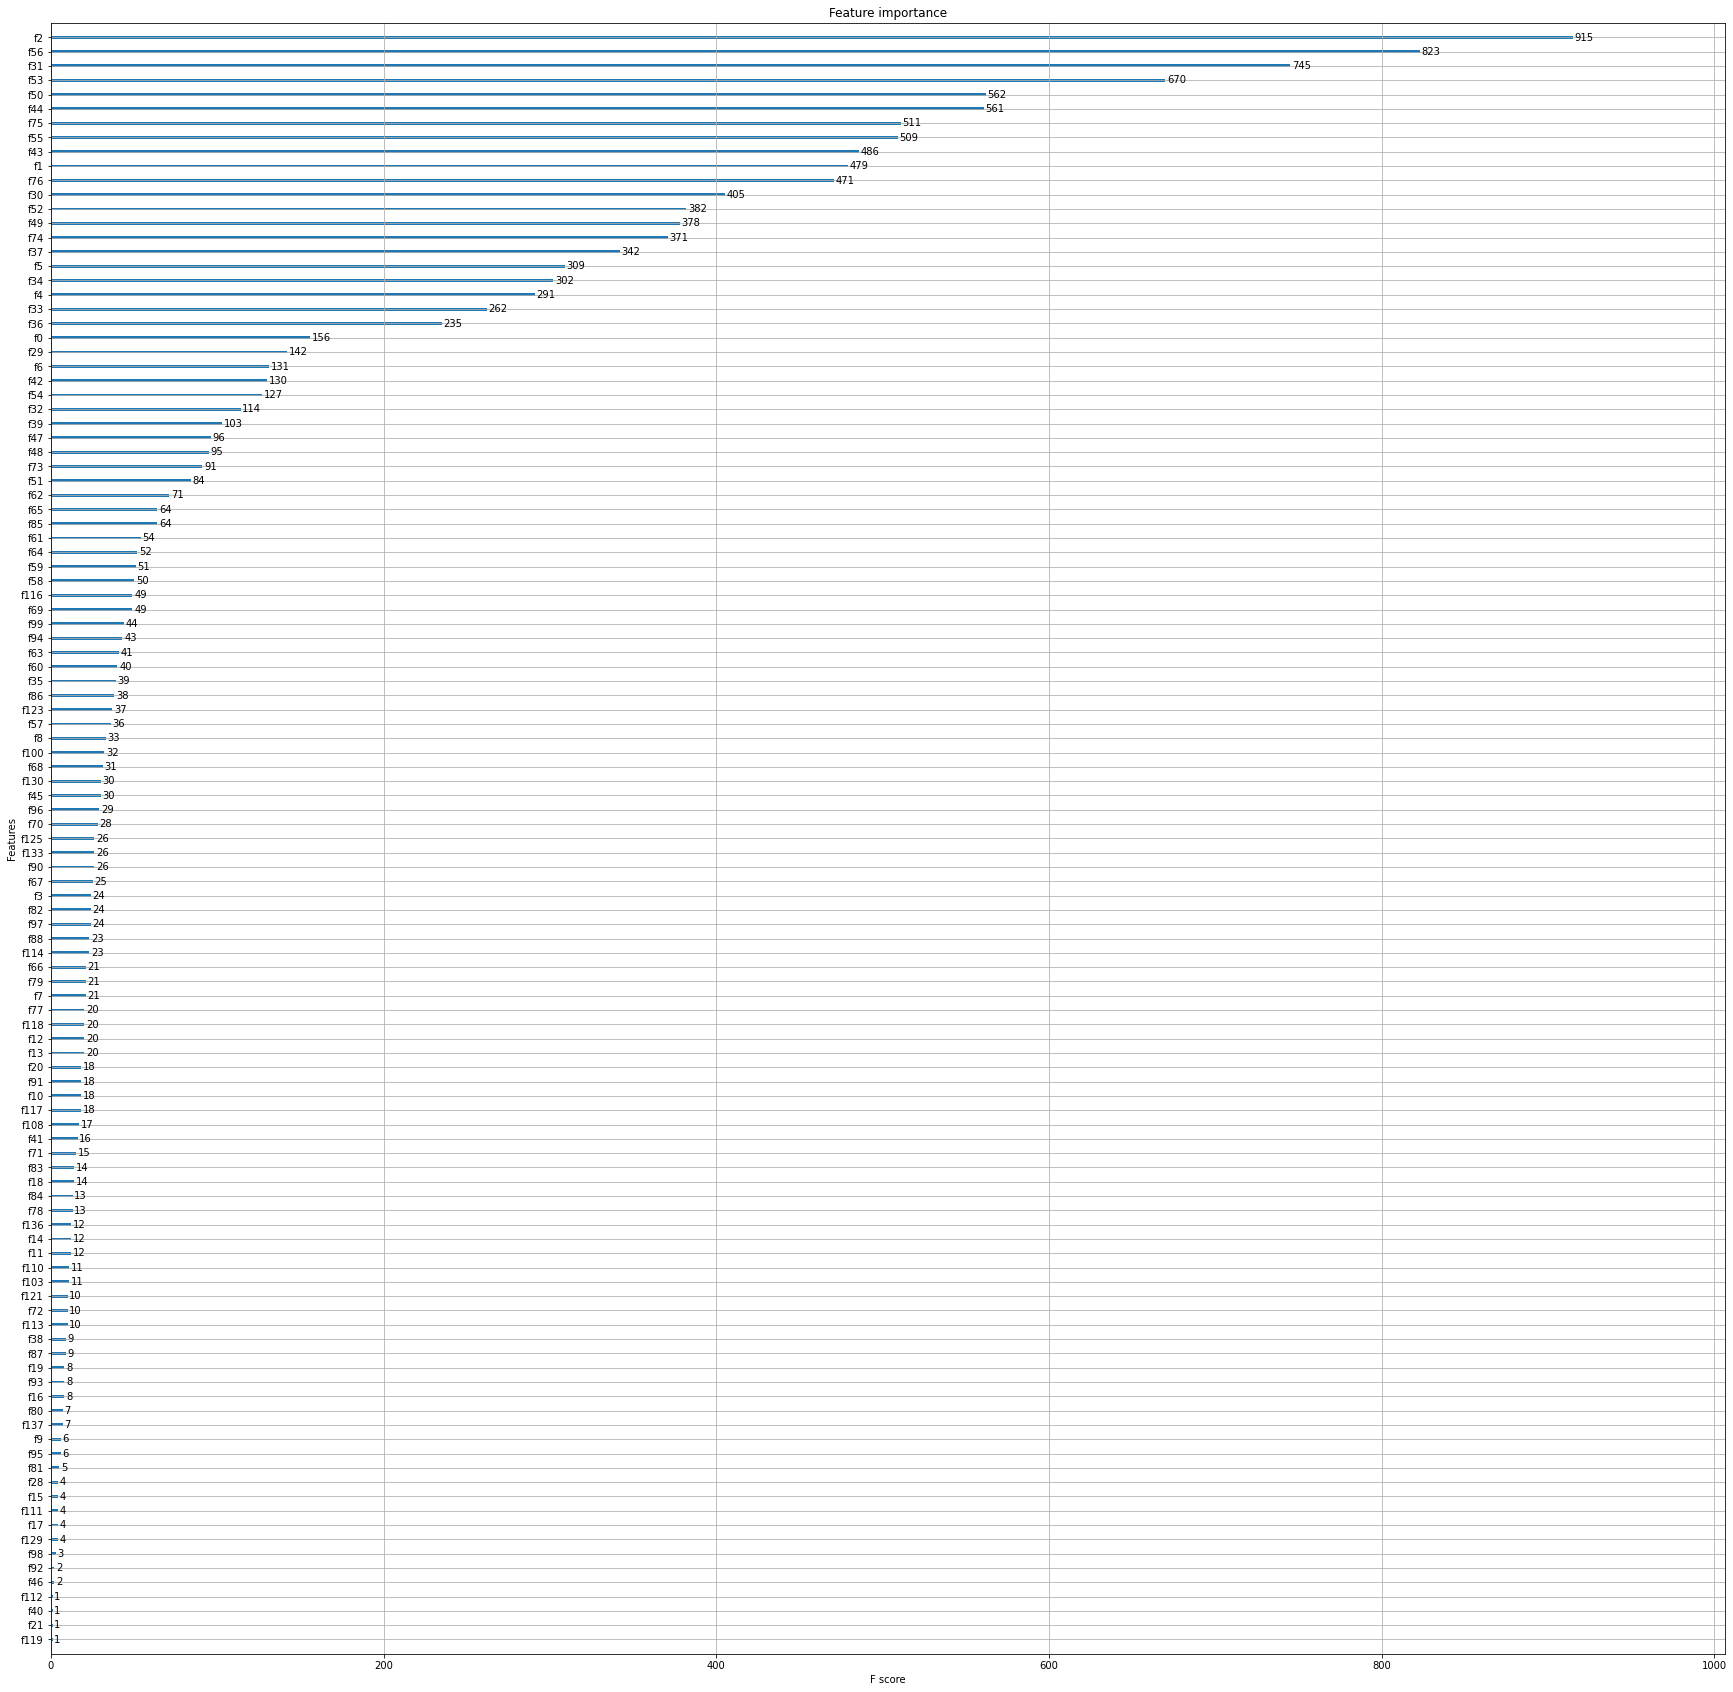

In [ ]:
plot_features(model, (30,30))

In [ ]:
importances = model.feature_importances_
features = train_values.columns.tolist()
ordered_features = {}

for i, feature in enumerate(features): 
  ordered_features.update({feature: importances[i]})

ordered_features

In [ ]:
sorted(ordered_features.items(), key=lambda item: item[1], reverse=True)

[('foundation_type_i', 0.012886155),
 ('inhabited_building', 0.011430998),
 ('range_age_old', 0.011366761),
 ('max_secondary_use_geo_level_3_id_has_secondary_use_rental', 0.011277586),
 ('has_more_floors_geo_level_1_id', 0.010821216),
 ('plan_configuration_d', 0.010259371),
 ('legal_ownership_status_a', 0.010145529),
 ('ground_floor_type_v', 0.010093952),
 ('ground_floor_type_f', 0.01005881),
 ('ground_floor_type_x', 0.010038029),
 ('other_floor_type_x', 0.009977502),
 ('has_superstructure_rc_engineered', 0.009896991),
 ('has_superstructure_bamboo', 0.009861598),
 ('count_buildings_geo_level_2_id', 0.009837961),
 ('land_surface_condition_t', 0.009717999),
 ('count_floors_pre_eq', 0.009668139),
 ('land_surface_condition_o', 0.009658051),
 ('mean_height_geo_level_1_id', 0.009635658),
 ('other_floor_type_j', 0.009606471),
 ('families_and_secondary_use', 0.009555057),
 ('count_families_geo_level_2_id', 0.009547777),
 ('position_s', 0.009522463),
 ('has_superstructure_mud_mortar_brick', 0.0

# Pasaje a CSV de los nuevos Features

In [ ]:
train_values.to_csv('train_values_complete_features_remix.csv')

In [ ]:
test_values.to_csv('test_values_complete_features_remix.csv')